In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

In [3]:
#load data
file_path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small','ocean_avg_spinUp_0007.nc')
tides = xr.open_dataset(file_path)

file_path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small_noTides','ocean_avg_spinUp_0007.nc')
no_tides = xr.open_dataset(file_path)

grid_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_v2.0_frc','waom10_small_grd.nc')
grd = xr.open_dataset(grid_path)

In [4]:
#convert melt rate from m_water/second into m_ice/years
w2i = 1025/917
s2a = 3600*24*365

for ds in [no_tides,tides]:
    ds['m']=ds.m*s2a*w2i

In [5]:
#calculate area integrated annual mean melt rate for both cases and their difference
dA = 1/(grd.pm*grd.pn)
rho0 = 1025

ml_nt = (no_tides.m.mean('ocean_time').where((grd.zice < 0.0)&(grd.mask_rho==1))*dA*rho0*(10**-12)).sum()
ml_t = (tides.m.mean('ocean_time').where((grd.zice < 0.0)&(grd.mask_rho==1))*dA*rho0*(10**-12)).sum()

<IPython.core.display.Javascript object>


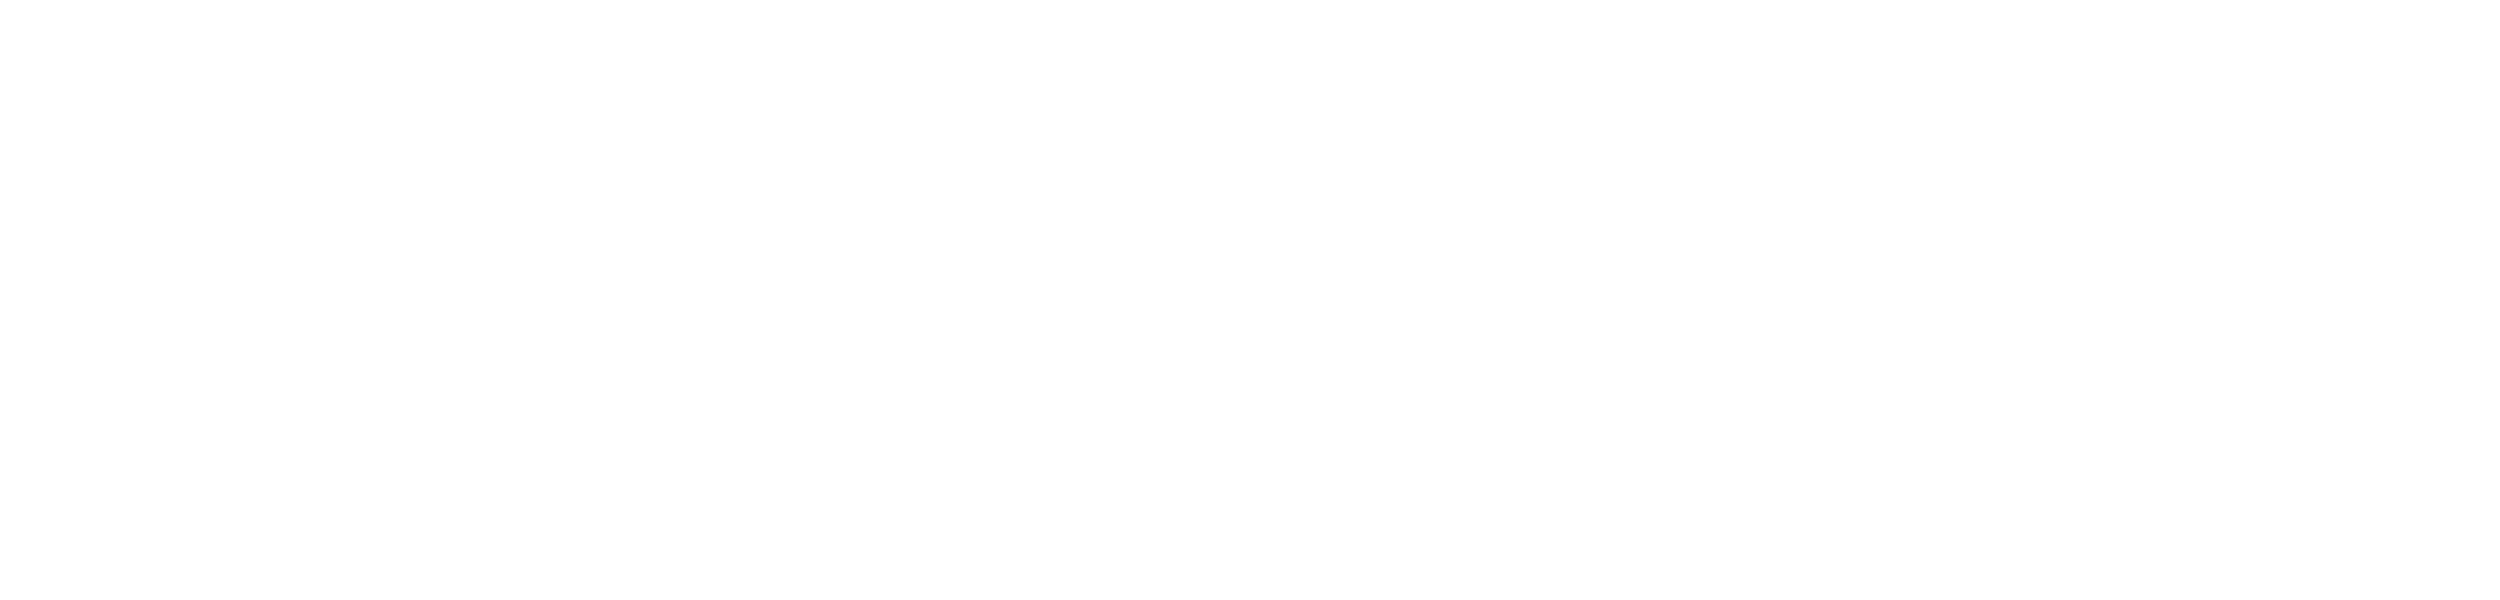

In [6]:
#plot annual average melt rate and integrated mass loss of no_tides and tides case
%matplotlib notebook
plt.close()
fig,axes = plt.subplots(ncols=4,figsize=(25,6))
ax1,ax2,ax3,ax4 = axes.flatten()
fig.suptitle('Annual mean basal melt rates in m/a (area integrated mass loss in Gt/a)')

no_tides.m.mean('ocean_time').plot(cmap=plt.cm.bwr,ax=ax1,vmin=-3,vmax=3)
ax1.set_title('Without tides \n (%.2f Gt/a)' %ml_nt.values)
tides.m.mean('ocean_time').plot(cmap=plt.cm.bwr,ax=ax2,vmin=-3,vmax=3)
ax2.set_title('With tides \n (%.2f Gt/a)' %ml_t.values)

(tides.m.mean("ocean_time") - no_tides.m.mean('ocean_time')).plot(cmap=plt.cm.bwr,ax=ax3,vmin=-1,vmax=1)
ax3.set_title('Tides - Without tides \n (%.2f Gt/a)' %((ml_t-ml_nt).values))

((tides.m.mean("ocean_time") - no_tides.m.mean('ocean_time'))/no_tides.m.mean('ocean_time')*100).plot(cmap=plt.cm.bwr,ax=ax4,vmin=-100,vmax=100)
ax4.set_title('realtive change in percent \n (%.2f percent)' %((ml_t-ml_nt)/ml_nt*100).values)

for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.axis('off')
  
plt.tight_layout()

plt.show()

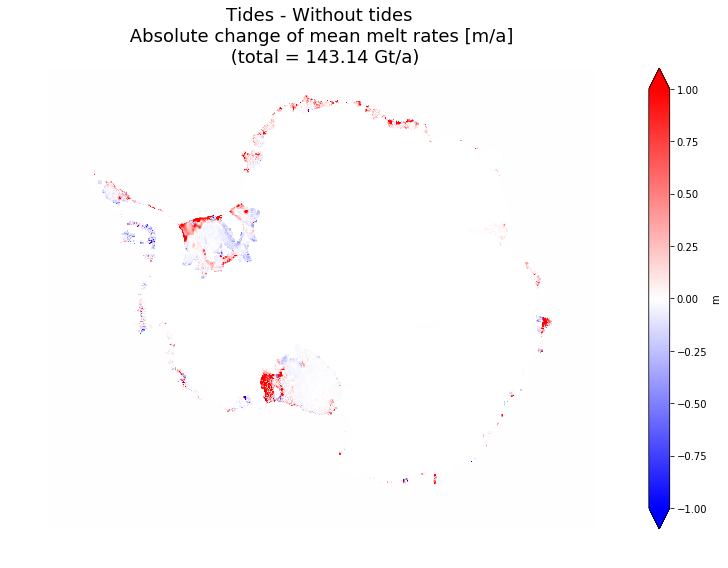

In [35]:
%matplotlib inline
plt.close()
fig,ax = plt.subplots(1,figsize=(15,8))
plot = (tides.m.mean("ocean_time") - no_tides.m.mean('ocean_time')).plot(cmap=plt.cm.bwr,ax=ax,vmin=-1,vmax=1)
ax.set_title('Tides - Without tides \n Absolute change of mean melt rates [m/a] \n (total = %.2f Gt/a)' %((ml_t-ml_nt).values),fontsize=18)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.show()

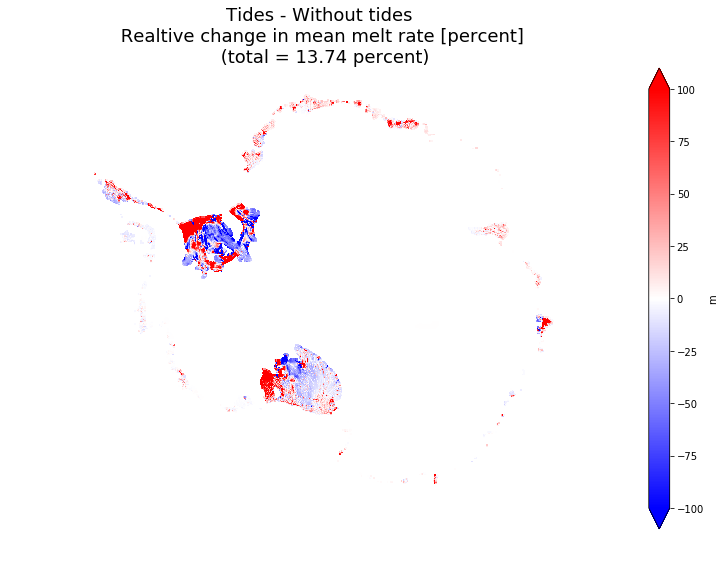

In [34]:
%matplotlib inline
plt.close()
fig,ax4 = plt.subplots(1,figsize=(15,8))
((tides.m.mean("ocean_time") - no_tides.m.mean('ocean_time'))/no_tides.m.mean('ocean_time')*100).plot(cmap=plt.cm.bwr,ax=ax4,vmin=-100,vmax=100)
ax4.set_title('Tides - Without tides \n Realtive change in mean melt rate [percent] \n (total = %.2f percent)' %((ml_t-ml_nt)/ml_nt*100).values,fontsize=18)
ax4.set_aspect('equal')
ax4.axis('off')
plt.tight_layout()
plt.show()